In [ ]:
from torchvision.datasets import MNIST
from torchvision import transforms


In [14]:
from torch.utils.data import DataLoader
def get_dataloader(train=True):
    mnist = MNIST(root='./dataset',train=train,download=False,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,),(0.3081,))
    ]))
    data_loader = DataLoader(dataset=mnist,batch_size=64,shuffle=True)
    return data_loader

In [15]:
import torch.nn.functional as F
import torch.nn as nn
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet,self).__init__()
        self.fc1 = nn.Linear(28*28*1,28)
        self.fc2 = nn.Linear(28,10)
        
    def forward(self,x):
        x = x.view(-1,28*28*1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x,dim=-1)

C:\Users\26250\AppData\Local\Temp\ipykernel_5240\541657051.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./model/model.pkl'))
C:\User

loss: 0.05726700648665428
loss: 0.07127304375171661
loss: 0.013231099583208561
loss: 0.01885378547012806
loss: 0.1406414657831192
loss: 0.06876485049724579
loss: 0.08733072131872177
loss: 0.03817649930715561
loss: 0.008439894765615463
loss: 0.0867304801940918
loss: 0.01664252206683159
loss: 0.07976162433624268
loss: 0.024547455832362175
loss: 0.027651207521557808
loss: 0.03525536134839058
loss: 0.008265825919806957
loss: 0.023094963282346725
loss: 0.11366209387779236
loss: 0.03789926692843437
loss: 0.038677241653203964


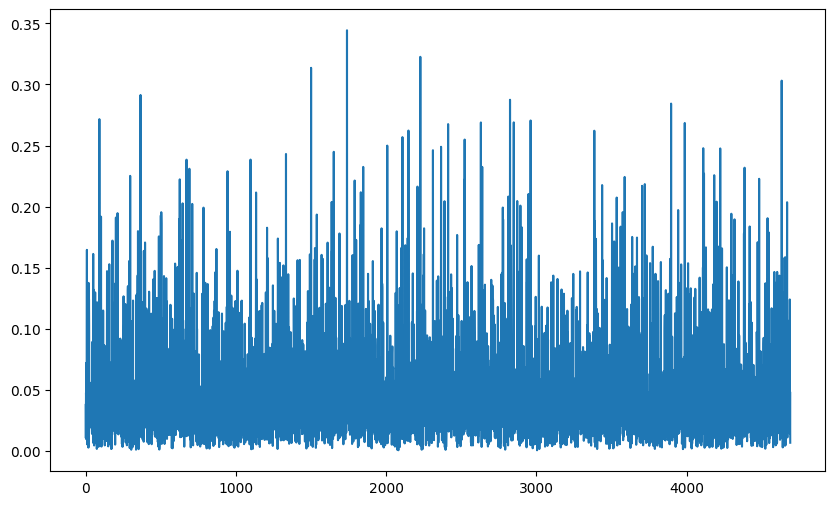

In [16]:
import torch
import os
model = MNISTNet()
optimiser = torch.optim.Adam(model.parameters(),lr = 0.0005)

if os.path.exists('./model/model.pkl'):
    model.load_state_dict(torch.load('./model/model.pkl'))
    optimiser.load_state_dict(torch.load('./model/optimiser.pkl'))
    
hist = []
def train(epoch):
    dataloader = get_dataloader()
    for idx,(input,target) in enumerate(dataloader):
        optimiser.zero_grad()
        pred = model(input)
        loss = F.nll_loss(pred,target=target)
        loss.backward()
        optimiser.step()
        hist.append(loss.detach())
        if (idx+1)%200==0:
            print('loss:',loss.item())
        
for i in range(5):
    train(i)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(hist)

In [17]:
torch.save(optimiser.state_dict(),'./model/optimiser.pkl')
torch.save(model.state_dict(),'./model/model.pkl')

0.962082 0.15609482


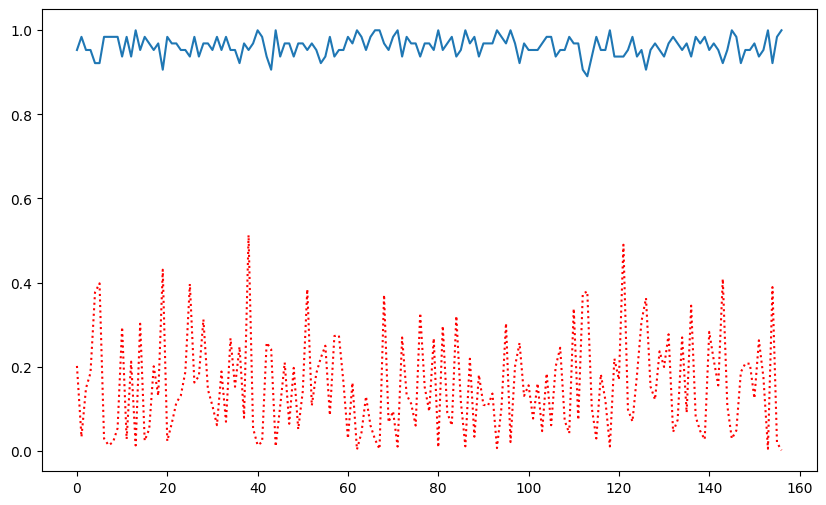

In [18]:
import numpy as np
def test():
    loss_list = []
    acc_list = []
    test_dataloader = get_dataloader(train=False)
    for idx,(input,target) in enumerate(test_dataloader):
        with torch.no_grad():
            pred = model(input)
            loss = F.nll_loss(pred,target=target)
            loss_list.append(loss)
            pred = pred.max(dim=-1)[-1]
            cur_acc = pred.eq(target).float().mean()
            acc_list.append(cur_acc)
    print(np.mean(acc_list),np.mean(loss_list))
    return acc_list,loss_list

acc,loss = test()
fig = plt.figure(figsize=(10,6))
plt.plot(acc)
plt.plot(loss,'r:')
    